In [34]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate,  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import set_config
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
set_config(display="diagram")



hotel_bookings = pd.read_csv(r"D:\Data Science\Projects\Hotel\dataset\hotel_bookings.csv")
hotel_bookings.describe()
#print(hotel_bookings.columns.tolist())

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
bookings_by_month = hotel_bookings.groupby('arrival_date_month', as_index= False)[['hotel']].count()#.rename(columns={'hotel':''})
bookings_by_month

,arrival_date_month,hotel
0,April,11089
1,August,13877
2,December,6780
3,February,8068
4,January,5929
5,July,12661
6,June,10939
7,March,9794
8,May,11791
9,November,6794


In [18]:
bookings_by_month = hotel_bookings.groupby('arrival_date_month', as_index= False)[['hotel']].count().rename(columns={'hotel':'nb_bookings'})
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig = px.bar(bookings_by_month, x = 'arrival_date_month', y = 'nb_bookings',
            title='Bookings by month',
            category_orders={'arrival_date_month':months})
fig.show(config={'displayModeBar': False})

In [26]:

features_num = ['lead_time', 'arrival_date_year', 'arrival_date_week_number',
                'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'agent', 'company', 'is_repeated_guest', 'adults', 'babies', 'children',
                'previous_cancellations', 'previous_bookings_not_canceled',
                'required_car_parking_spaces', 'total_of_special_requests', 'adr']

features_cat =[
    'hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'deposit_type', 'customer_type' 
]
                
                
features =  features_num  + features_cat
    
X = hotel_bookings[features]
y = hotel_bookings['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 420)
                
                
                
                
                

In [20]:
transformer_num = SimpleImputer(strategy ='constant')
transformer_cat = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", transformer_num, features_num),
    ("cat", transformer_cat, features_cat)
])

preprocessor

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='constant'),
                                 ['lead_time', 'arrival_date_year',
                                  'arrival_date_day_of_month',
                                  'arrival_date_week_number',
                                  'arrival_date_day_of_month',
                                  'stays_in_weekend_nights',
                                  'stays_in_week_nights', 'agent', 'company',
                                  'is_repeated_guest', 'adults', 'babies',
                                  'children', 'previous_cancellations',
                                  'previous_bookings_...anceled',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests', 'adr']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['hotel', 'arrival_date_month', 'meal',
                                  'market_segment', 'distribution_channel',
                                  'reserved_room_type', 'deposit_type',
                                  'customer_type'])])

In [27]:
steps = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=1234))
])
steps.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_day_of_month',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'agent', 'company',
                                                   'is_repeated_guest',
                                                   'adults', 'babies',
                                                   'children',
                                                   'previous_ca...
                                                   'total_of_special_requests',
                                                   'adr']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('model', DecisionTreeClassifier(random_state=1234))])

C:\Users\theli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



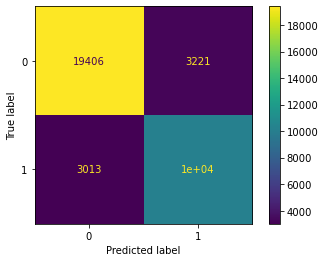

In [28]:
plot_confusion_matrix(steps, X_test, y_test)

In [35]:
y_pred = steps.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

conf = confusion_matrix(y_test, y_pred)
print(conf)

accuracy = (conf[0][0] + conf[1][1])/ np.sum(conf)
print(accuracy)

0.825948571907195
[[19406  3221]
 [ 3013 10177]]
0.825948571907195
